In [2]:
# load the libraries
library(ggplot2, quietly = TRUE)
library(data.table,quietly = TRUE)
library(magrittr, quietly = TRUE)
library(reshape2, quietly = TRUE)
library(dplyr, quietly = TRUE)
library(zoo, quietly = TRUE)

In [9]:
# load the data
dtDataLoader <- function(cPathCsv) {
  dtData <- read.csv(file = cPathCsv, stringsAsFactors = FALSE) %>%
    data.table::as.data.table()
  dtData <- dtData[, list(Data, Zamkniecie, Wolumen)] 
  setnames(x = dtData, old = c("Data", "Zamkniecie", "Wolumen"), 
           new = c("date", "close_price", "volume"))
  dtData[, date := as.Date(dtData[, date, ], format = "%Y-%m-%d"), ]
  return(dtData)
}
dtSpx <- dtDataLoader(cPathCsv = file.path(getwd(), "data", "spx_d.csv"))
dtDjia <- dtDataLoader(cPathCsv = file.path(getwd(), "data", "djia_d.csv"))
dtDjta <- dtDataLoader(cPathCsv = file.path(getwd(), "data", "djta_d.csv"))

In [10]:
# 1. look at the S&P 500 and QEs
plotSpxDaily <- ggplot2::ggplot(data = dtSpx) + 
  ggplot2::aes(x = date, y = close_price) +
  ggplot2::geom_line() +
  ggplot2::theme_bw() +
  ggplot2::xlab(label = "Time") +
  ggplot2::ylab(label = "index value in points") +
  ggplot2::ggtitle(label = "S&P 500 index [daily]", 
                   subtitle = "Stooq.pl data, scope: 1 Jan 2007 - 31 Dec 2018") +
  ggplot2::theme(plot.title = ggplot2::element_text(hjust = 0.5, size = 14), 
                 plot.subtitle = ggplot2::element_text(hjust = 0.5, size = 10)) +
  ggplot2::geom_vline(xintercept = as.double(as.Date("2008-09-15", format = "%Y-%m-%d")), 
                      size = 0.5, color = "red") +
  ggplot2::annotate(geom = "text", label = "Lehman Brothers \n bankruptcy",
                    x = as.Date("2008-09-20", format = "%Y-%m-%d"), 
                    y = 1750.0) +
  ggplot2::geom_vline(xintercept = as.double(as.Date("2008-11-26", 
                                                     format = "%Y-%m-%d")), 
                      size = 0.5, color = "blue") + 
  ggplot2::geom_vline(xintercept = as.double(as.Date("2010-06-30", 
                                                     format = "%Y-%m-%d")),
                      size = 0.5, color = "blue") +
  ggplot2::annotate("rect", xmin = as.Date("2008-11-26", format = "%Y-%m-%d"), 
                    xmax = as.Date("2010-06-30", format = "%Y-%m-%d"),
                    ymin = 0, ymax = 3000, alpha = 0.2, fill = "blue") +
  ggplot2::ylim(c(0, 3000)) +
  ggplot2::annotate(geom = "text", label = "QE1", 
                    x = as.Date("2009-10-01", format = "%Y-%m-%d"), 
                    y = 2500, size = 7) + 
  ggplot2::geom_vline(xintercept = as.double(as.Date("2010-11-01", 
                                                     format = "%Y-%m-%d")),
                      size = 0.5, color = "blue") + 
  ggplot2::geom_vline(xintercept = as.double(as.Date("2011-06-30", format = "%Y-%m-%d")), 
                      size = 0.5, color = "blue") +
  ggplot2::annotate(geom = "rect", 
                    xmin = as.Date("2010-11-01", format = "%Y-%m-%d"), 
                    xmax = as.Date("2011-06-30", format = "%Y-%m-%d"), 
                    ymin = 0, 
                    ymax = 3000, alpha = 0.2, fill = "blue") +
  ggplot2::annotate(geom = "text", 
                    x = as.Date("2011-03-15", format = "%Y-%m-%d"), 
                    y = 300, label = "QE2", size = 7) + 
  ggplot2::geom_vline(xintercept = as.double(as.Date("2012-09-13", 
                                                     format = "%Y-%m-%d")),
                      size = 0.5, color = "blue") + 
  ggplot2::geom_vline(xintercept = as.double(as.Date("2013-06-19", format = "%Y-%m-%d")), 
                      size = 0.5, color = "blue") +
  ggplot2::annotate(geom = "rect", 
                    xmin = as.Date("2012-09-13", format = "%Y-%m-%d"), 
                    xmax = as.Date("2013-06-19", format = "%Y-%m-%d"), 
                    ymin = 0, 
                    ymax = 3000, alpha = 0.2, fill = "blue") +
  ggplot2::annotate(geom = "text", 
                    x = as.Date("2013-01-15", format = "%Y-%m-%d"), 
                    y = 1000, label = "QE3", size = 7)


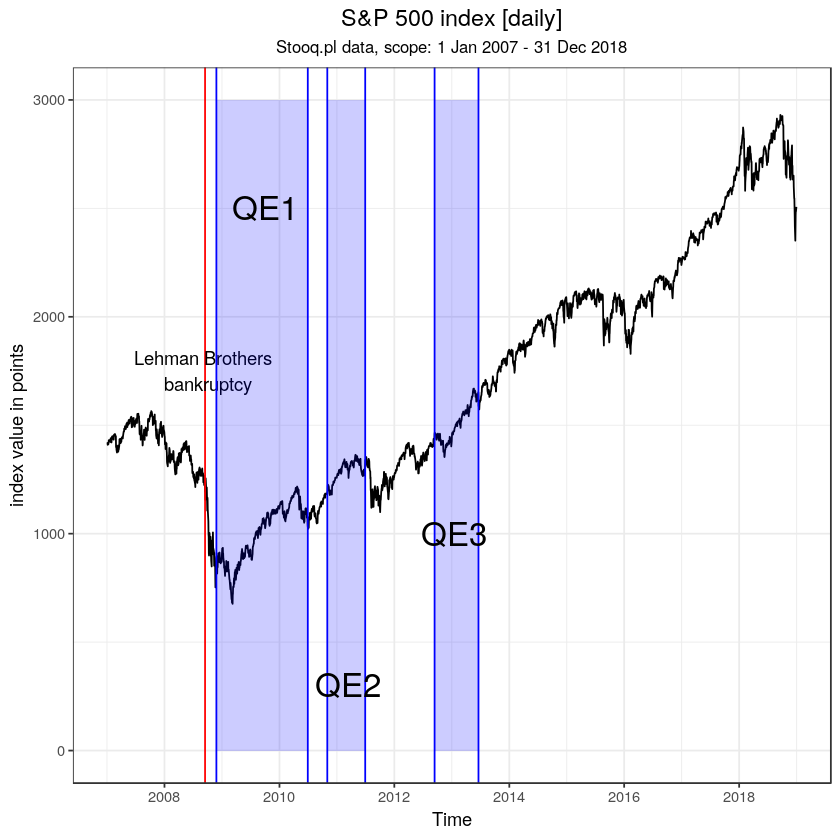

In [11]:
plotSpxDaily

In [ ]:
# 2. look at the years 2014-2018: 200D and 50D moving averages
dtS